# Group Members:

*   Name 1 Albert Santos Moya 240690
*   Name 2 Elsa Ruiz Vargas 241545
*   Name 3 Héctor García de Marina 240571

# Lab 2 Assignment

In [65]:
#from google.colab import drive
#drive.mount('/content/drive')

In [66]:
#%cd "PUT_YOUR_PATH"

# **Practical session 2: an image denoising energy**

## **1. Gradient descent**

In [67]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from IPython import display

### **1. Complete the MatLab functions toy_fun and toy_gradient. These functions implement the function f and its gradient.**

**toy_fun**

\begin{equation}
f(x_1,x_2) = \frac1{1000}\left(x_1^4 + x_2^4 - 80 x_1^2 - 60 x_2^2 + 100x_1 +
50 x_2 + 1\right)
\end{equation}

In [68]:
def toy_fun(x: np.matrix):
    """
    Polynomial toy function - see the guide
    
    :param x: list [x_1, x_2] 
    
    :return y: value of the function at point x
    """
    # TODO: Compute the function
    toy_fun = (1/1000)*(x[0]**4 + x[1]**4 - 80*x[0]**2 -60*x[1]**2 + 100*x[0]+50*x[1]+1)
    return toy_fun

In [69]:
x=[100,1]
toy_fun(x)

99209.992

**toy_gradient**

### **Gradient Descent Recap**

Given a function $f(x)$:

Set:
+ initial/starting point $x^{0}$
+ step size $\eta$
+ tolerance $\tau$
+ maximum number of iterations $K$


At iteration $k=0,1,2,\cdots K$,

1.   Compute:
$$\nabla_{x} f(x^{k})$$
2.   Take $\eta$ steps in the direction of steepest descent:
$$x^{k+1} = x^{k} - \eta\nabla_{x} f(x^{k})$$
3.   Repeat 1 and 2 until $\|\nabla_{x} f(x^{k})\|_{2}\leq \tau$ or the maximum number of iterations has been exceeded





$x$, $x^{0}\in \mathbb{R}^{n}$

We know that:

$$\nabla f(x_{1},x_{2}) =
\begin{bmatrix}
\dfrac{\partial f(x_{1},x_{2})}{\partial x_{1}}\\
\\
\dfrac{\partial f(x_{1},x_{2})}{\partial x_{2}}
\\
\end{bmatrix} =
\begin{bmatrix}
\frac1{1000}\left(4x_1^3 - 160 x_1 + 100\right)\\
\\
\frac1{1000}\left(4x_2^3 - 120 x_2 + 50\right)
\\
\end{bmatrix}$$

In [70]:
def toy_gradient(x: np.matrix):
    """
    Gradient of toy_fun polynomial toy function 
    
    :param x: 2x1 matrix 
    :return grad: 2x1 matrix: gradient of the toy function at point x
    """
    # TODO: Compute the gradient of the toy function (must be calculated by hand)
    grad = np.matrix([4*x[0,0]**3 -160*x[0,0]+100, 4*x[1,0]**3-120*x[1,0]**2+50]).T
    return grad

In [71]:
x = np.matrix([[1,2]]).T
print(x.shape), print(x[0,0]), print(x[1][0])
toy_gradient(x)

(2, 1)
1
[[2]]


matrix([[ -56],
        [-398]])

### **2. Complete the MatLab function gradient_descent. This function implements a gradient descent algorithm. We are going to implement it in a way in which we can use the same gradient descent function for this toy example and for the denoising energy of the next section. Follow the comments provided in the code.**

In [60]:
def gradient_descent(callback,
                     callback_params: dict, 
                     initial_condition: np.matrix, 
                     step_size: float,
                     max_iterations: int,
                     tolerance: float,
                     fig = None,
                     ax = None):
    """
    Implementation of the gradient descent algorithm with
    fixed step size. It uses function handles (handles are MatLab pointers). It
    can work with any function and gradient if they are implemented with . Here params
    is a structure with the internal parameters of my_fun and my_grad.

    :param callback: gradient of function to be optimized
    :param callback_params: a structure with the internal parameters of the target function and 
                            its gradient. Useful for the image denoising task.
    :param initial_condition: initial condition for gradient descent
    :param step_size: size of the gradient descent steps
    :param max_iterations: maximum number of iterations
    :param tolerance: tolerance for the stopping condition (it stop when 
                      the norm of the gradient is below the tolerance)

    :return current_value: value found
    """
    # Initialize variables
    current_value = initial_condition
    previous_value = current_value
    current_iteration = 0
    current_norm_value = np.inf
    
    # Main loop for Gradient Descent
    while (current_norm_value > tolerance) and (current_iteration < max_iterations):
        # Keep previous - just for visualization
        previous_value = current_value

        # TODO: Run the gradient descent
        gf = callback(current_value, **callback_params)
        
        # TODO: Update the current value and norm value of gradient
        current_value = current_value - step_size*gf
        current_norm_value = np.linalg.norm(gf)
        print("{} of {} -> tolerance: {}".format(current_iteration, max_iterations, current_norm_value))
        
        # Plot current position! Just for visualization purposes 
        # if x is a 2x1 vector (visualization of toy example) 
        if (current_value.shape[0] == 2) & (current_value.shape[1] == 1):
            if not ax:
                fig, ax = plt.subplots()
            ax.plot(current_value[1, 0], current_value[0, 0], marker = 'o', color = "k")
            ax.plot([previous_value[1, 0], current_value[1, 0]], 
                    [previous_value[0, 0], current_value[0, 0]], "-k")
            display.clear_output(wait=True)
            display.display(fig)            

        # Update the iteration
        current_iteration += 1
        
    return current_value

KeyboardInterrupt: 

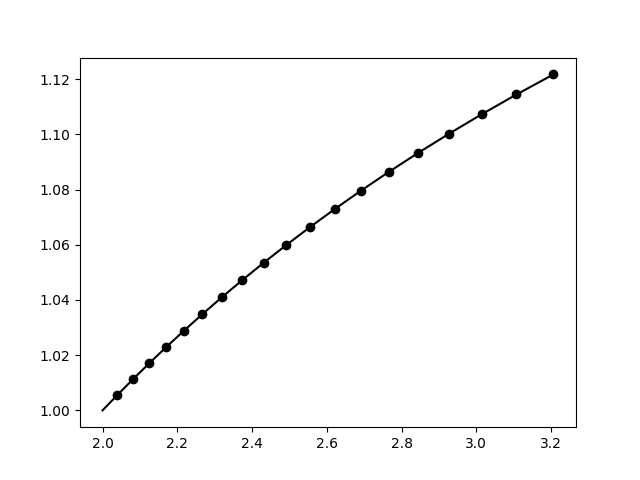

In [72]:
gradient_descent(toy_gradient, {}, np.matrix([[1,2]]).T, 0.0001, 100, 0.0001)

### **3 Run the following block and answer the questions on the PDF**

In [75]:
def toy_main():
    # Set the grids
    x1 = np.arange(-10, 10, 0.1)
    x2 = np.arange(-10, 10, 0.1)

    # Evaluate the toy_fun
    y = np.zeros(shape = (len(x1), len(x2)))
    for i, x1_value in enumerate(x1):
        for j, x2_value in enumerate(x2):
            y[i, j] = toy_fun([x1_value, x2_value])

    # Plot the surface.
    fig = plt.figure(figsize = (14, 8))
    # ax = fig.gca(projection='3d')
    ax = fig.add_subplot(projection='3d')
    X, Y = np.meshgrid(x1, x2)
    Z = y
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

    # Show the surface
    #plt.show()

    # Plot the contours
    fig_contours, ax_contours = plt.subplots(figsize = (10, 8))
    CS = ax_contours.contour(X, Y, Z, 
                    corner_mask = False, levels = 150, 
                    linewidths=(1,), cmap = cm.coolwarm)
    
    # Set initial condition --> TRY CHANGING IT
    x0 = np.matrix([[5], [-5]])

    # Set gradient descent parameters --> EXPLORE USING DIFFERENT PARAMETERS
    step_size= 1
    tolerance = 0.01
    max_iterations = 10

    # Call gradient descent minimization
    print("First gradient descent ...")
    xs_1 = gradient_descent(callback = toy_gradient,
                            callback_params = {}, 
                            initial_condition = x0, 
                            step_size = step_size,
                            max_iterations = max_iterations,
                            tolerance = tolerance,
                            fig = fig_contours,
                            ax = ax_contours)

    # Set gradient descent parameters --> EXPLORE USING DIFFERENT PARAMETERS
    step_size= 5
    tolerance = 0.1
    max_iterations = 10

    # Call gradient descent minimization
    print("\nSecond gradient descent ...")
    xs_2 = gradient_descent(callback = toy_gradient,
                            callback_params = {}, 
                            initial_condition = x0, 
                            step_size = step_size,
                            max_iterations = max_iterations,
                            tolerance = tolerance,
                            fig = fig_contours,
                            ax = ax_contours)

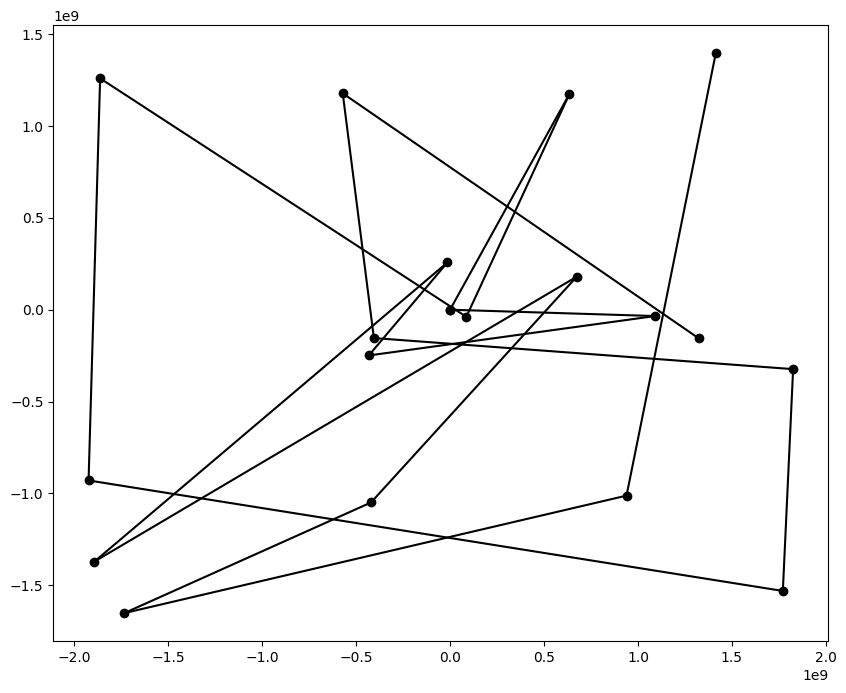

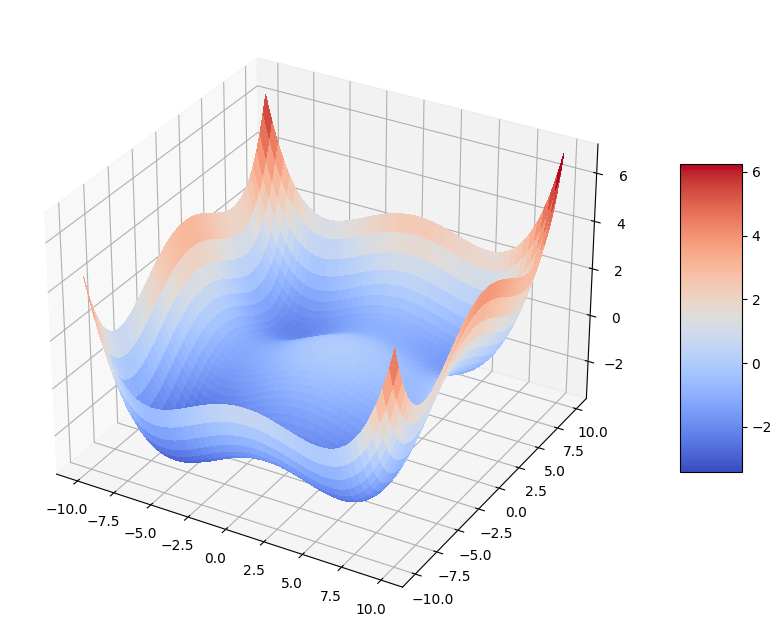

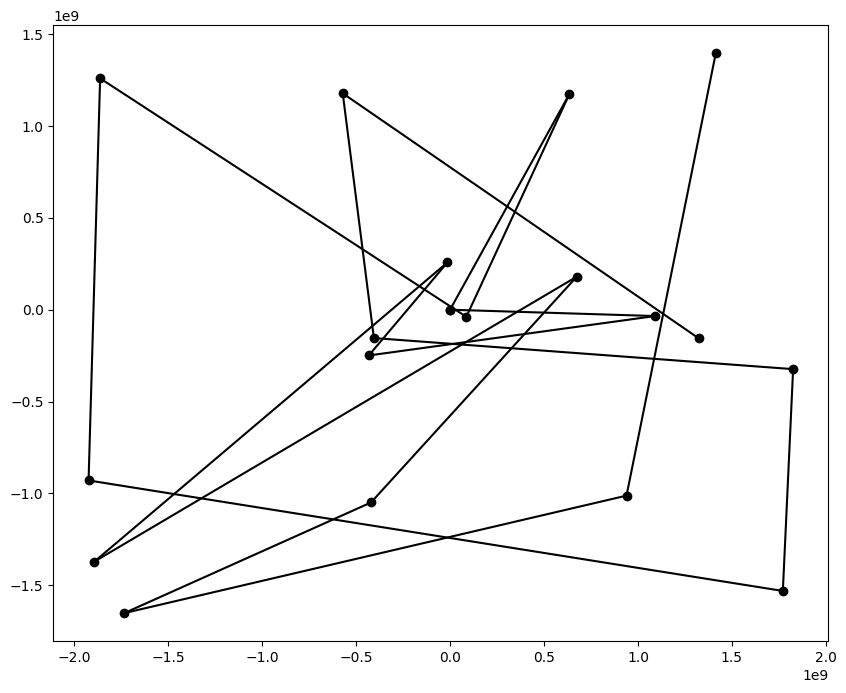

In [76]:
%matplotlib inline
toy_main()

## **2. Image denoising energy**

### **1. Complete the functions _im_fwd_gradient_ and _im_bwd_divergence_. These functions compute the forward gradient &nabla;<sup>+</sup> and the backwards divergence div<sup>-</sup>. Follow the comments provided in the code. Avoid building the matrices &nabla;<sup>+</sup> and div<sup>-</sup>**

#### **1.1 im_fwd_gradient**

For matrix $u$, $\nabla^{+}u_{i,j} = (\nabla^{+}_{i}u_{i,j},\nabla^{+}_{j}u_{i,j})$ where:

$$\nabla^{+}_{i}u_{i,j} = \begin{cases}
  u_{i+1,j} - u_{i,j} & \text{if }i<M\\ 
  0& \text{if }i=M
\end{cases}$$

$$\nabla^{+}_{j}u_{i,j} = \begin{cases}
  u_{i,j+1} - u_{i,j} & \text{if }j<N\\ 
  0& \text{if }j=N
\end{cases}
$$


In [54]:
def im_fwd_gradient(image: np.matrix):
    """
    Discrete gradient of an image using forward differences, with homogeneous Neuman boundary conditions.

    :param u: image (MxN)
            
    :return gradu_j: partial derivative in the j (rows) direction (also x direction)
    :return gradu_i: partial derivative in the i (cols) direction (also y direction)
    """
    # TODO: Get the size of the image
    image_shape = ()
    
    # TODO: Calculate both gradients
    gradu_i = np.matrix([])
    gradu_j = np.matrix([])
    return gradu_i, gradu_j

In [ ]:
m = np.array([[1,2,0],[-1,4,3],[3,-5,1]])
m

In [ ]:
gradu_i,gradu_j=im_fwd_gradient(m)
print(f"forward row gradient: \n{gradu_i},\nforward column gradient: \n{gradu_j}")

#### **1.2 im_bwd_divergence**

For matrix $u$, with $u^{1} = \nabla^{+}_{i}u_{i,j}$ and $u^{2} = \nabla^{+}_{j}u_{i,j}$:

$$(div^{-}\,u) = 
\begin{cases}
  u^{1}_{i,j} - u^{1}_{i-1,j} & \text{if }1< i<M\\ 
  u^{1}_{i,j} & \text{if }i=1\\
  - u^{1}_{i-1,j} & \text{if }i=M
\end{cases}
+
\begin{cases}
  u^{2}_{i,j} - u^{2}_{i,j-1} & \text{if }1< j<N\\ 
  u^{2}_{i,j} & \text{if }j=1\\
  - u^{2}_{i,j-1} & \text{if }j=N
\end{cases}
$$

In [ ]:
def im_bwd_divergence(gradient_i: np.matrix,
                      gradient_j: np.matrix):
    """
    Discrete divergence of a vector field using backwards differences. 
    This is the negative transpose of the im_fwd_gradient
    
    :param gradient_i: component of g in the direction j (rows) (also x direction)
    :param gradient_j: component of g in the direction i (cols) (also y direction)
    
    :return divg: backwards divergence of g
    """
    divg = np.matrix([])
    
    # TODO: Backwards i partial derivative of gradient_i
    

    # TODO: Backwards j partial derivative of gradient_j
    
    return divg

In [ ]:
im_bwd_divergence(gradu_i,gradu_j)

### **2. Complete the functions denoise_energy and denoise_energy_gradient following the comments provided in the code. Avoid building sparse huge matrices.**

Let:

+ $u \rightarrow$ Decision variable (final image)
+ $f \rightarrow$ Noisy data

Then,

\begin{equation}
	E(u) = \overbrace{\sum_{i = 1}^M\sum_{j = 1}^N c_{ij}|\nabla^+u_{ij}|^2}^{\text{regularization}}  +	\beta \overbrace{\sum_{i = 1}^M\sum_{j = 1}^N (u_{ij} -	f_{ij})^2,}^{\text{data attachment}}
\end{equation}

In [ ]:
def denoise_energy(image: np.matrix,
                   noise: np.matrix,
                   coefficients: np.matrix,
                   beta: float):
    """
    Evaluates the denoising energy from an image and the noisy
    data (see the guide)

    :param  image: target image (MxN)
    :param  noise: (MxN) noisy data for attachment term 
    :param  coefficients: (MxN) coefficients image for regularization term
    :param  beta: (1x1) weight of attachment term

    :return e: energy value
    """
    energy = 0.0
    
    # TODO: Calculate the regularization term
    
    # TODO: Calculate the data attachment term

    return energy

In [ ]:
image_real = np.array([[1,2,3], [5,6,7], [8,9,10]])
image_noisy = image_real + 5 * np.ones_like(image_real)
denoise_energy(image_real,
               image_noisy,
               np.ones_like(image_noisy),
               .05)
# The solution to the above example should be 92.25

Also,

\begin{equation}
	\nabla E(u) = -2div^{-}(C\nabla^+u_{ij}) + 2\beta(u - f)
\end{equation}

In [ ]:
def denoise_energy_gradient(image: np.matrix,
                            noise: np.matrix,
                            coefficients: np.matrix,
                            beta: float):
    """
    Evaluates the denoising energy gradient from an image and the noisy data (see the guide)

    :param image: target image (MxN)
    :param noise: (MxN) noisy data for attachment term 
    :param coefficients: (MxN) coefficients image for regularization term
    :param beta: (1x1) weight of attachment term

    :return grade : (MxN) gradient of energy at u

    Hint: For entry wise multiplication of numpy.matrix objects use np.multiply
    """
    grade = 0.0
    
    # TODO: Calculate the gradient of regularization term
    
    # TODO: Calculate the gradient of data attachment term
    
    # TODO: Calculate the gradient
    
    return grade

In [ ]:
image_real = np.array([[1,2,3], [5,6,7], [8,9,10]])
image_noisy = image_real + 5 * np.ones_like(image_real)
denoise_energy_gradient(image_real,
               image_noisy,
               np.ones_like(image_noisy),
               .05)

### **3. Run the blocks with different denoising parameters (&beta; and c). In the report, show results with different values of &beta; and different images c (you can use the examples provided in the notebook). Describe the effect of these parameters in the result.**

**Load the image**

In [ ]:
images_dir = os.path.abspath("../images")
image_real = np.array(Image.open(os.path.join(images_dir, "lena.pgm")))
plt.figure()
plt.title("Real image")
plt.imshow(image_real, cmap = "gray")

**Add noise to the image**

In [ ]:
image_noisy = image_real + np.random.uniform(high = 50, size = image_real.shape)
plt.figure()
plt.title("Noisy data")
plt.imshow(image_noisy, cmap = "gray")

**Run the Gradient Descent**

In [ ]:
# Define the gradient descent parameters
callback_params = {
    "noise": image_noisy,
    "coefficients": np.ones_like(image_noisy),    # --> CHANGE THIS AND COMPARE
    "beta": .05                                   # --> CHANGE THIS AND COMPARE
}
step_size = .01                                   # --> CHANGE THIS AND COMPARE
max_iterations = 200                              # --> CHANGE THIS AND COMPARE
tolerance = .1                                    # --> CHANGE THIS AND COMPARE

# Run the gradient descent
image_gd = gradient_descent(callback = denoise_energy_gradient,
                            callback_params = callback_params, 
                            initial_condition = image_noisy, 
                            step_size = step_size, 
                            max_iterations = max_iterations,
                            tolerance = tolerance)

**Show the results**

In [ ]:
# Show the different images
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 12))
ax1.imshow(image_real, cmap = "gray")
ax1.set_title("Real image")
ax2.imshow(image_noisy, cmap = "gray")
ax2.set_title("Noisy data")
ax3.imshow(image_gd, cmap = "gray")
ax3.set_title("Gradient Descent image")

In [ ]:
# Show the absolute error among images
noise = abs(image_real - image_noisy)
denoised = abs(image_gd - image_real)

# Plot
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 12))
ax1.imshow(noise, cmap = "gray")
ax1.set_title("Absolute error: real image vs noisy")
ax2.imshow(denoised, cmap = "gray")
ax2.set_title("Absolute error: real image vs denoised")

In [ ]:
plt.figure(figsize = (20, 12))
plt.imshow(abs(image_gd - image_noisy), cmap = "gray")
plt.title('method noise')